# Model Clasification

## Import common Package

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

import joblib

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_clean=pd.read_csv('data_clean.csv')

In [3]:
df_clean.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df=df_clean.copy()

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_month,reservation_date,reservation_name_day,reservation_year
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,July,2,Thursday,2015
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,July,2,Thursday,2015
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,July,3,Friday,2015
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,July,3,Friday,2015
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,9.0,0,Transient,107.0,0,0,Check-Out,July,3,Friday,2015


In [6]:
df.shape

(117424, 34)

In [7]:
df['is_canceled'].value_counts()/len(df)

0    0.625238
1    0.374762
Name: is_canceled, dtype: float64

In [8]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = bsDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[0, 1]"
2,lead_time,int64,0,0.0,478,"[4, 326]"
3,arrival_date_year,int64,0,0.0,3,"[2017, 2015]"
4,arrival_date_month,object,0,0.0,12,"[May, August]"
5,arrival_date_week_number,int64,0,0.0,53,"[37, 16]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[5, 30]"
7,stays_in_weekend_nights,int64,0,0.0,16,"[13, 0]"
8,stays_in_week_nights,int64,0,0.0,32,"[9, 32]"
9,adults,int64,0,0.0,5,"[0, 1]"


In [9]:
df.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_month,reservation_name_day
count,117424,117424,117424,117424,117424,117424,117424,117424,117424,117424,117424,117424,117424
unique,2,12,4,177,7,4,9,11,3,4,3,12,7
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,July,Monday
freq,78117,13707,90809,47501,56109,96912,84571,73209,102676,88161,73418,11949,18431


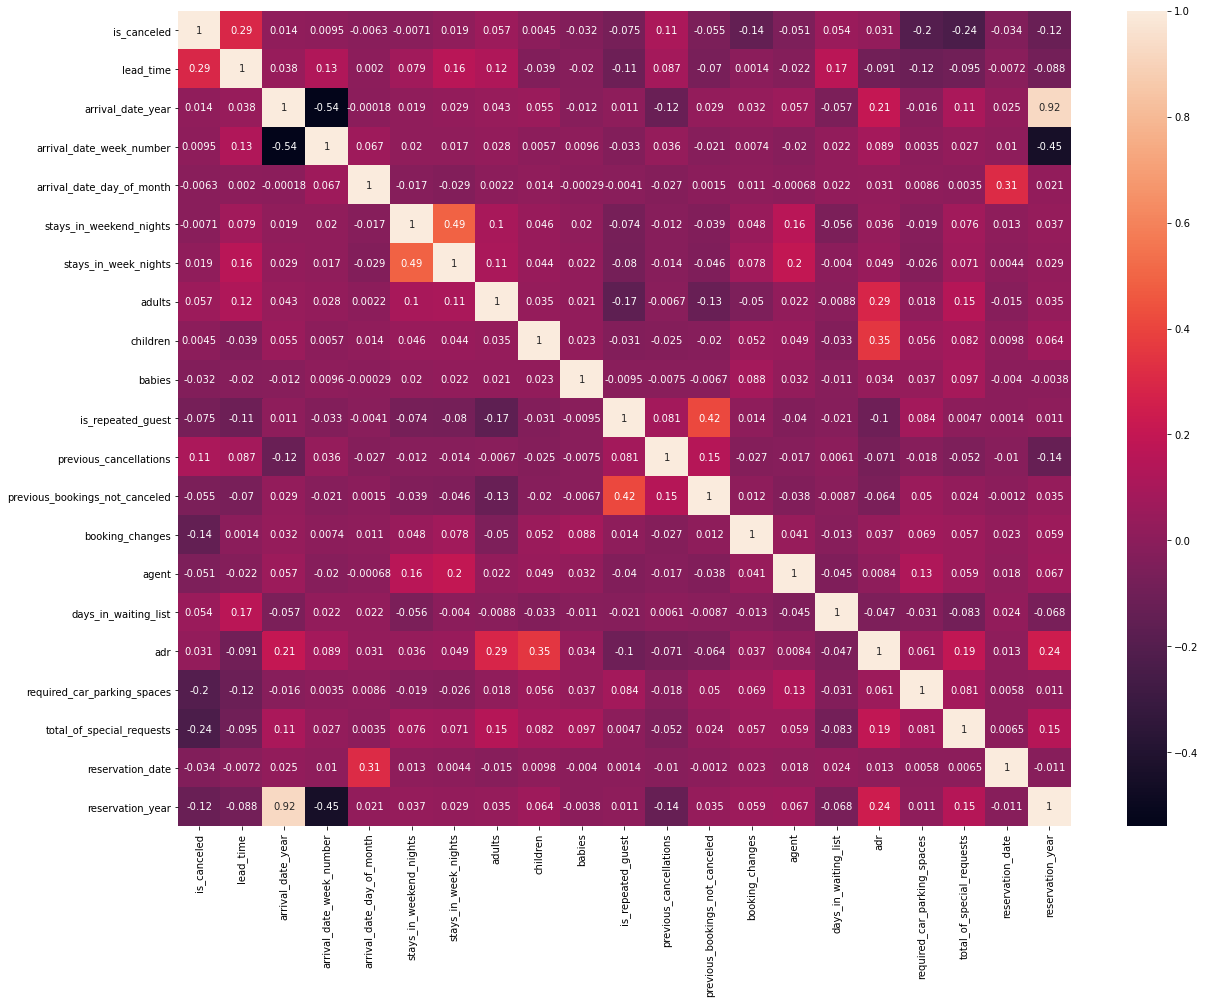

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_month', 'reservation_date',
       'reservation_name_day', 'reservation_year'],
      dtype='object')

In [12]:
df=df.drop(columns=['reservation_status','reservation_month', 'reservation_date','reservation_name_day', 'reservation_year'])

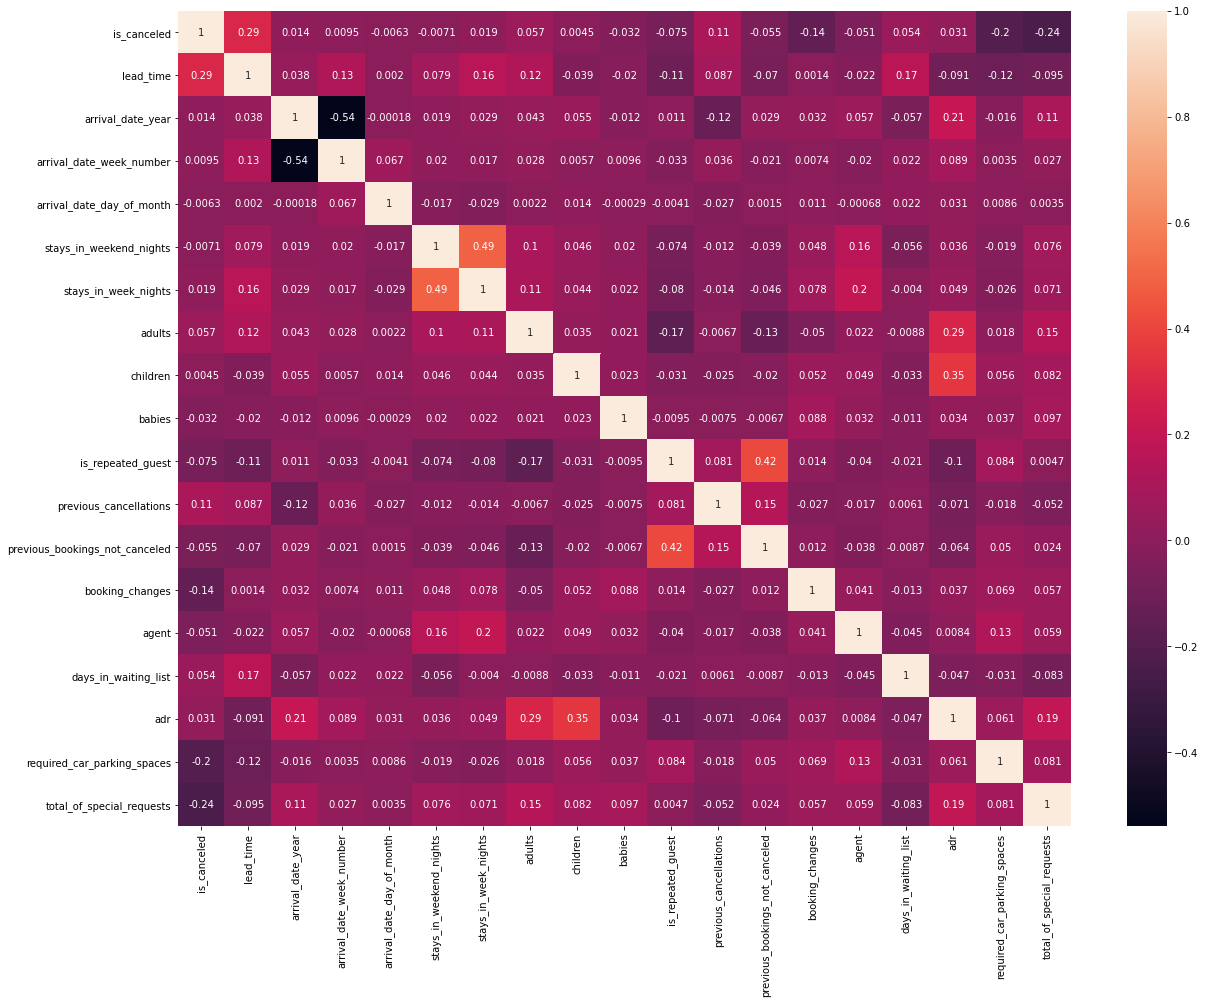

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data Convertion

#### List :
- hotel : 0,1 (Label encoding)
- arrival_date_month	 : 1-12 (label encoding)
- meal : OHC 
- country	: top 10, OHC
- market_segment	  OHC
- distribution_channel	 : OHC
- reserved_room_type : OHC 
- assigned_room_type : OHC
- deposit_type : OHC
- customer_type : OHC


In [14]:
top_10 = df.country.value_counts().head(10).index.to_list()
top_10 = df.country.value_counts().head(10).index.to_list()
df['country'] = df['country'].apply(lambda x: 'Other' if x not in top_10 else x)

In [15]:
## Converting
# 1. hotel
df['hotel'] = df['hotel'].map({'City Hotel': 0, 'Resort Hotel':1})

# 2. arrival_date_month
df['arrival_date_month'] = df['arrival_date_month'].map({
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
})

#3. country
top_10 = df.country.value_counts().head(10).index.to_list()
df['country'] = df['country'].apply(lambda x: 'Other' if x not in top_10 else x)

#4. OHC
df = pd.get_dummies(data = df, columns=['meal', 'country', 'market_segment',"distribution_channel","deposit_type",'customer_type','reserved_room_type','assigned_room_type'],prefix_sep='__')

In [16]:
df.shape

(117424, 73)

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'meal__BB', 'meal__FB', 'meal__HB',
       'meal__SC', 'country__BEL', 'country__BRA', 'country__DEU',
       'country__ESP', 'country__FRA', 'country__GBR', 'country__IRL',
       'country__ITA', 'country__Other', 'country__PRT',
       'market_segment__Aviation', 'market_segment__Complementary',
       'market_segment__Corporate', 'market_segment__Direct',
       'market_segment__Groups', 'market_segment__Offline TA/TO',
       'market_segment__Online TA', 'distribution_channel__Corporate',
       'distribution_chann

In [18]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal__BB,meal__FB,meal__HB,meal__SC,country__BEL,country__BRA,country__DEU,country__ESP,country__FRA,country__GBR,country__IRL,country__ITA,country__Other,country__PRT,market_segment__Aviation,market_segment__Complementary,market_segment__Corporate,market_segment__Direct,market_segment__Groups,market_segment__Offline TA/TO,market_segment__Online TA,distribution_channel__Corporate,distribution_channel__Direct,distribution_channel__GDS,distribution_channel__TA/TO,deposit_type__No Deposit,deposit_type__Non Refund,deposit_type__Refundable,customer_type__Contract,customer_type__Group,customer_type__Transient,customer_type__Transient-Party,reserved_room_type__A,reserved_room_type__B,reserved_room_type__C,reserved_room_type__D,reserved_room_type__E,reserved_room_type__F,reserved_room_type__G,reserved_room_type__H,reserved_room_type__L,assigned_room_type__A,assigned_room_type__B,assigned_room_type__C,assigned_room_type__D,assigned_room_type__E,assigned_room_type__F,assigned_room_type__G,assigned_room_type__H,assigned_room_type__I,assigned_room_type__K,assigned_room_type__L
0,1,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,9.0,0,75.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,9.0,0,107.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
df["previous_cancellations"].value_counts()

0     111032
1       6005
2         97
3         58
24        48
11        35
26        26
25        25
6         22
19        19
4         16
14        14
5         14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [20]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal__BB,meal__FB,meal__HB,meal__SC,country__BEL,country__BRA,country__DEU,country__ESP,country__FRA,country__GBR,country__IRL,country__ITA,country__Other,country__PRT,market_segment__Aviation,market_segment__Complementary,market_segment__Corporate,market_segment__Direct,market_segment__Groups,market_segment__Offline TA/TO,market_segment__Online TA,distribution_channel__Corporate,distribution_channel__Direct,distribution_channel__GDS,distribution_channel__TA/TO,deposit_type__No Deposit,deposit_type__Non Refund,deposit_type__Refundable,customer_type__Contract,customer_type__Group,customer_type__Transient,customer_type__Transient-Party,reserved_room_type__A,reserved_room_type__B,reserved_room_type__C,reserved_room_type__D,reserved_room_type__E,reserved_room_type__F,reserved_room_type__G,reserved_room_type__H,reserved_room_type__L,assigned_room_type__A,assigned_room_type__B,assigned_room_type__C,assigned_room_type__D,assigned_room_type__E,assigned_room_type__F,assigned_room_type__G,assigned_room_type__H,assigned_room_type__I,assigned_room_type__K,assigned_room_type__L
0,1,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,9.0,0,75.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,9.0,0,107.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117419,0,0,23,2017,8,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
117420,0,0,102,2017,8,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
117421,0,0,34,2017,8,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
117422,0,0,109,2017,8,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# MACHINE LEARNING MODEL - CLASSIFICATION 

# SPLIT DATA

In [21]:
X=df.drop(columns=['is_canceled'])
y=df['is_canceled']

In [22]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = .20, random_state = 42)

In [23]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'meal__BB', 'meal__FB', 'meal__HB',
       'meal__SC', 'country__BEL', 'country__BRA', 'country__DEU',
       'country__ESP', 'country__FRA', 'country__GBR', 'country__IRL',
       'country__ITA', 'country__Other', 'country__PRT',
       'market_segment__Aviation', 'market_segment__Complementary',
       'market_segment__Corporate', 'market_segment__Direct',
       'market_segment__Groups', 'market_segment__Offline TA/TO',
       'market_segment__Online TA', 'distribution_channel__Corporate',
       'distribution_channel__Direct', 'distribu

# Base Model

## Random Forest - Base model

In [24]:
RF_base = RandomForestClassifier().fit(X_train,y_train)

In [25]:
y_pred_RF_base = RF_base.predict(X_test)
y_pred_RF_base_tr = RF_base.predict(X_train)

RF_acc_base_train = accuracy_score(y_train, y_pred_RF_base_tr)
RF_acc_base_ts = accuracy_score(y_test, y_pred_RF_base)
RF_rec_base_train = recall_score(y_train, y_pred_RF_base_tr)
RF_rec_base_ts = recall_score(y_test, y_pred_RF_base)
RF_prec_base_train = precision_score(y_train, y_pred_RF_base_tr)
RF_prec_base_ts = precision_score(y_test, y_pred_RF_base)
RF_f1_base_train = f1_score(y_train, y_pred_RF_base_tr)
RF_f1_base_ts = f1_score(y_test, y_pred_RF_base)

print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14684
           1       0.90      0.82      0.86      8801

    accuracy                           0.90     23485
   macro avg       0.90      0.88      0.89     23485
weighted avg       0.90      0.90      0.90     23485



In [26]:
print(classification_report(y_train, y_pred_RF_base_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58734
           1       1.00      0.99      0.99     35205

    accuracy                           1.00     93939
   macro avg       1.00      1.00      1.00     93939
weighted avg       1.00      1.00      1.00     93939



In [27]:
cm_RF_1 = confusion_matrix(y_test, y_pred_RF_base, labels=[1, 0])
df_RF_1 = pd.DataFrame(cm_RF_1, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_RF_1

,Pred 1,Pred 0
Akt 1,7208,1593
Akt 0,840,13844


## Decision Tree - Base Model

In [29]:
base_dt = DecisionTreeClassifier()

In [30]:
base_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred_DT_test = base_dt.predict(X_test)
y_pred_DT_train =base_dt.predict(X_train)

In [32]:
DT_acc_base_train = accuracy_score(y_train, y_pred_DT_train)
DT_acc_base_ts = accuracy_score(y_test, y_pred_DT_test)
DT_rec_base_train = recall_score(y_train, y_pred_DT_train)
DT_rec_base_ts = recall_score(y_test, y_pred_DT_test)
DT_prec_base_train = precision_score(y_train, y_pred_DT_train)
DT_prec_base_ts = precision_score(y_test, y_pred_DT_test)
DT_f1_base_train = f1_score(y_train, y_pred_DT_train)
DT_f1_base_ts = f1_score(y_test, y_pred_DT_test)

In [33]:
print(classification_report(y_train, y_pred_DT_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58734
           1       1.00      0.99      0.99     35205

    accuracy                           1.00     93939
   macro avg       1.00      1.00      1.00     93939
weighted avg       1.00      1.00      1.00     93939



In [34]:
print(classification_report(y_test, y_pred_DT_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     14684
           1       0.81      0.81      0.81      8801

    accuracy                           0.86     23485
   macro avg       0.85      0.85      0.85     23485
weighted avg       0.86      0.86      0.86     23485



In [35]:
cm_DT = confusion_matrix(y_train, y_pred_DT_train, labels=[1, 0])
df_DT_1 = pd.DataFrame(cm_DT, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_DT_1

,Pred 1,Pred 0
Akt 1,34911,294
Akt 0,82,58652


In [36]:
cm_DT_test = confusion_matrix(y_test, y_pred_DT_test, labels=[1, 0])
df_KNN_test = pd.DataFrame(cm_DT_test, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_KNN_test

,Pred 1,Pred 0
Akt 1,7161,1640
Akt 0,1633,13051


## XGradient Boosting - Base Model

In [37]:
XGB_base_model=XGBClassifier()

In [38]:
XGB_base_model.fit(X_train,y_train)

y_pred_XGB_base=XGB_base_model.predict(X_test)
y_pred_XGB_base_tr=XGB_base_model.predict(X_train)

XGB_acc_base_train = accuracy_score(y_train, y_pred_XGB_base_tr)
XGB_acc_base_ts = accuracy_score(y_test, y_pred_XGB_base)
XGB_rec_base_train = recall_score(y_train, y_pred_XGB_base_tr)
XGB_rec_base_ts = recall_score(y_test, y_pred_XGB_base)
XGB_prec_base_train = precision_score(y_train, y_pred_XGB_base_tr)
XGB_prec_base_ts = precision_score(y_test, y_pred_XGB_base)
XGB_f1_base_train = f1_score(y_train, y_pred_XGB_base_tr)
XGB_f1_base_ts = f1_score(y_test, y_pred_XGB_base)

print(classification_report(y_test, y_pred_XGB_base))

[00:23:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     14684
           1       0.86      0.81      0.84      8801

    accuracy                           0.88     23485
   macro avg       0.88      0.87      0.87     23485
weighted avg       0.88      0.88      0.88     23485



In [39]:
print(classification_report(y_train, y_pred_XGB_base_tr))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     58734
           1       0.88      0.84      0.86     35205

    accuracy                           0.90     93939
   macro avg       0.89      0.89      0.89     93939
weighted avg       0.90      0.90      0.90     93939



In [40]:
cm_XGB_1 = confusion_matrix(y_test, y_pred_XGB_base, labels=[1, 0])
df_XGB_1 = pd.DataFrame(cm_XGB_1, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_XGB_1

,Pred 1,Pred 0
Akt 1,7151,1650
Akt 0,1121,13563


# Feature Engineering - Polynomial 

In [103]:
num_col=df[['lead_time', 'arrival_date_year', 'stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies','previous_cancellations',
       'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests']
]

In [104]:
poly=PolynomialFeatures(degree=3 ,include_bias=False,interaction_only=False)

X_poly_3 = poly.fit_transform(num_col)

df_Poly=pd.DataFrame(X_poly_3)
# df_Poly

In [105]:
df_poly_full=pd.concat([df, df_Poly], axis=1)

In [106]:
df_poly_full.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal__BB,meal__FB,meal__HB,meal__SC,country__BEL,country__BRA,country__DEU,country__ESP,country__FRA,country__GBR,country__IRL,country__ITA,country__Other,country__PRT,market_segment__Aviation,market_segment__Complementary,market_segment__Corporate,market_segment__Direct,market_segment__Groups,market_segment__Offline TA/TO,market_segment__Online TA,distribution_channel__Corporate,distribution_channel__Direct,distribution_channel__GDS,distribution_channel__TA/TO,deposit_type__No Deposit,deposit_type__Non Refund,deposit_type__Refundable,customer_type__Contract,...,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678
0,1,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,9.0,0,75.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,421875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,421875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941192.0,0.0,9604.0,0.0,0.0,98.0,0.0,0.0,0.0,1.0
3,1,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941192.0,0.0,9604.0,0.0,0.0,98.0,0.0,0.0,0.0,1.0
4,1,0,0,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,9.0,0,107.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1225043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df_poly_full=df_poly_full.drop(columns=['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies','previous_cancellations',
       'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests']
)

In [108]:
## Splitting data

In [109]:
X_pol=df_poly_full.drop(columns=['is_canceled'])
Y_pol=df_poly_full['is_canceled']

In [110]:
X_train_pol,X_test_pol,Y_train_pol,Y_test_pol=train_test_split(X_pol,Y_pol,stratify=Y_pol,test_size=0.2,random_state=42,)

In [111]:
X_train_pol.shape

(93939, 736)

In [112]:
X_test_pol.shape

(23485, 736)

## XGradient Boosting - POLY Model

In [113]:
XGB_model_pol=XGBClassifier()

In [114]:
XGB_model_pol.fit(X_train_pol,Y_train_pol)

y_pred_XGB_pol=XGB_model_pol.predict(X_test_pol)
y_pred_XGB_pol_tr=XGB_model_pol.predict(X_train_pol)

[09:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [115]:
XGB_acc_pol_train = accuracy_score(Y_train_pol, y_pred_XGB_pol_tr)
XGB_acc_pol_ts = accuracy_score(Y_test_pol, y_pred_XGB_pol)
XGB_rec_pol_train = recall_score(Y_train_pol, y_pred_XGB_pol_tr)
XGB_rec_pol_ts = recall_score(Y_test_pol, y_pred_XGB_pol)
XGB_prec_pol_train = precision_score(Y_train_pol, y_pred_XGB_pol_tr)
XGB_prec_pol_ts = precision_score(Y_test_pol, y_pred_XGB_pol)
XGB_f1_pol_train = f1_score(Y_train_pol, y_pred_XGB_pol_tr)
XGB_f1_pol_ts = f1_score(Y_test_pol, y_pred_XGB_pol)

print(classification_report(Y_test_pol, y_pred_XGB_pol))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14684
           1       0.87      0.81      0.84      8801

    accuracy                           0.88     23485
   macro avg       0.88      0.87      0.87     23485
weighted avg       0.88      0.88      0.88     23485



In [116]:
print(classification_report(Y_train_pol, y_pred_XGB_pol_tr))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     58734
           1       0.89      0.84      0.86     35205

    accuracy                           0.90     93939
   macro avg       0.90      0.89      0.89     93939
weighted avg       0.90      0.90      0.90     93939



In [117]:
cm_XGB_2 = confusion_matrix(Y_test_pol, y_pred_XGB_pol, labels=[1, 0])
df_XGB_2 = pd.DataFrame(cm_XGB_2, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_XGB_2

,Pred 1,Pred 0
Akt 1,7130,1671
Akt 0,1089,13595


## Random Forest - POLY Model

In [118]:
Rf_model_pol=RandomForestClassifier()

In [119]:
Rf_model_pol.fit(X_train_pol,Y_train_pol)

y_pred_RF_pol=Rf_model_pol.predict(X_test_pol)
y_pred_RF_pol_tr=Rf_model_pol.predict(X_train_pol)

In [120]:
RF_acc_pol_train = accuracy_score(Y_train_pol, y_pred_RF_pol_tr)
RF_acc_pol_ts = accuracy_score(Y_test_pol, y_pred_RF_pol)
RF_rec_pol_train = recall_score(Y_train_pol, y_pred_RF_pol_tr)
RF_rec_pol_ts = recall_score(Y_test_pol, y_pred_RF_pol)
RF_prec_pol_train = precision_score(Y_train_pol, y_pred_RF_pol_tr)
RF_prec_pol_ts = precision_score(Y_test_pol, y_pred_RF_pol)
RF_f1_pol_train = f1_score(Y_train_pol, y_pred_RF_pol_tr)
RF_f1_pol_ts = f1_score(Y_test_pol, y_pred_RF_pol)

print(classification_report(Y_test_pol, y_pred_RF_pol))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     14684
           1       0.89      0.77      0.83      8801

    accuracy                           0.88     23485
   macro avg       0.88      0.86      0.87     23485
weighted avg       0.88      0.88      0.88     23485



In [121]:
print(classification_report(Y_train_pol, y_pred_RF_pol_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58734
           1       1.00      0.99      0.99     35205

    accuracy                           1.00     93939
   macro avg       1.00      1.00      1.00     93939
weighted avg       1.00      1.00      1.00     93939



In [122]:
cm_RF_2 = confusion_matrix(Y_test_pol, y_pred_RF_pol, labels=[1, 0])
df_RF_2 = pd.DataFrame(cm_RF_2, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_RF_2

,Pred 1,Pred 0
Akt 1,6815,1986
Akt 0,855,13829


## Decision Tree - POLY Model

In [123]:
DT_model_pol=DecisionTreeClassifier()

In [124]:
DT_model_pol.fit(X_train_pol,Y_train_pol)

y_pred_DT_pol=DT_model_pol.predict(X_test_pol)
y_pred_DT_pol_tr=DT_model_pol.predict(X_train_pol)

In [125]:
DT_acc_pol_train = accuracy_score(Y_train_pol, y_pred_DT_pol_tr)
DT_acc_pol_ts = accuracy_score(Y_test_pol, y_pred_DT_pol)
DT_rec_pol_train = recall_score(Y_train_pol, y_pred_DT_pol_tr)
DT_rec_pol_ts = recall_score(Y_test_pol, y_pred_DT_pol)
DT_prec_pol_train = precision_score(Y_train_pol, y_pred_DT_pol_tr)
DT_prec_pol_ts = precision_score(Y_test_pol, y_pred_DT_pol)
DT_f1_pol_train = f1_score(Y_train_pol, y_pred_DT_pol_tr)
DT_f1_pol_ts = f1_score(Y_test_pol, y_pred_DT_pol)

print(classification_report(Y_test_pol, y_pred_DT_pol))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     14684
           1       0.81      0.81      0.81      8801

    accuracy                           0.86     23485
   macro avg       0.85      0.85      0.85     23485
weighted avg       0.86      0.86      0.86     23485



In [126]:
print(classification_report(Y_train_pol, y_pred_DT_pol_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58734
           1       1.00      0.99      0.99     35205

    accuracy                           1.00     93939
   macro avg       1.00      1.00      1.00     93939
weighted avg       1.00      1.00      1.00     93939



In [127]:
cm_DT_2 = confusion_matrix(Y_test_pol, y_pred_DT_pol, labels=[1, 0])
df_DT_2 = pd.DataFrame(cm_DT_2, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_DT_2

,Pred 1,Pred 0
Akt 1,7120,1681
Akt 0,1662,13022


## Hyperparameter tunning

## Decision Tree

In [131]:
skf=StratifiedKFold(n_splits=3)

In [132]:
DT_Tuned_base = DecisionTreeClassifier()

In [133]:
param_DT = {"max_depth": np.arange(2,50,1), 
             "min_samples_split": np.arange(2,30,1),
             "min_samples_leaf":np.arange(1,20,1), 
             "class_weight":[None,{0 : .2, 1 : .8},{0 : .1, 1 : .9}]}

In [134]:
DT_Tuned_base = RandomizedSearchCV(DT_Tuned_base, param_DT, cv = skf, n_jobs=-1, verbose =1,scoring='f1',n_iter=150,random_state=42)

In [135]:
DT_Tuned_base.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=150, n_jobs=-1,
                   param_distributions={'class_weight': [None, {0: 0.2, 1: 0.8},
                                                         {0: 0.1, 1: 0.9}],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
                   random_state=42, scoring='f1', verbose=1)

In [136]:
DT_Tuned_base.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 18,
 'class_weight': None}

In [137]:
DT_Tuned=DT_Tuned_base.best_estimator_

In [138]:
y_pred_DT_Tuned=DT_Tuned.predict(X_test)
y_pred_DT_Tuned_tr=DT_Tuned.predict(X_train)

In [139]:
DT_acc_tun_train = accuracy_score(y_train, y_pred_DT_Tuned_tr)
DT_acc_tun_ts = accuracy_score(y_test, y_pred_DT_Tuned)
DT_rec_tun_train = recall_score(y_train, y_pred_DT_Tuned_tr)
DT_rec_tun_ts = recall_score(y_test, y_pred_DT_Tuned)
DT_prec_tun_train = precision_score(y_train, y_pred_DT_Tuned_tr)
DT_prec_tun_ts = precision_score(y_test, y_pred_DT_Tuned)
DT_f1_tun_train = f1_score(y_train, y_pred_DT_Tuned_tr)
DT_f1_tun_ts = f1_score(y_test, y_pred_DT_Tuned)

print(classification_report(y_test, y_pred_DT_Tuned))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     14684
           1       0.83      0.82      0.82      8801

    accuracy                           0.87     23485
   macro avg       0.86      0.86      0.86     23485
weighted avg       0.87      0.87      0.87     23485



In [140]:
print(classification_report(y_train, y_pred_DT_Tuned_tr))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     58734
           1       0.87      0.87      0.87     35205

    accuracy                           0.90     93939
   macro avg       0.89      0.89      0.89     93939
weighted avg       0.90      0.90      0.90     93939



In [141]:
cm_DT_3 = confusion_matrix(y_test, y_pred_DT_Tuned, labels=[1, 0])
df_DT_3 = pd.DataFrame(cm_DT_3, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_DT_3

,Pred 1,Pred 0
Akt 1,7210,1591
Akt 0,1520,13164


## Random Forest

In [176]:
skf=StratifiedKFold(n_splits=3)

In [187]:
RF_Tuned_base = RandomForestClassifier()

In [188]:
param_RF = {"n_estimators":np.arange(100, 600,100),
             "max_depth": np.arange(2,30,2), 
             "min_samples_split": np.arange(2,20,2),
             "min_samples_leaf":np.arange(2,20,2), 
#              "class_weight":[ None, {0 : .5, 1 : .5}, {0 : .4, 1 : .6}]
           }

In [189]:
RF_Tuned_base = RandomizedSearchCV(RF_Tuned_base, param_RF, cv = skf, n_jobs=-1, verbose =1,scoring='f1',n_iter=150,random_state=42)

In [190]:
RF_Tuned_base.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 54.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 56.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=150, n_jobs=-1,
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500])},
                   random_state=42, scoring='f1', verbose=1)

In [191]:
RF_Tuned_base.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 28}

In [192]:
RF_Tuned=RF_Tuned_base.best_estimator_

In [193]:
y_pred_RF_Tuned=RF_Tuned.predict(X_test)
y_pred_RF_Tuned_tr=RF_Tuned.predict(X_train)

In [194]:
RF_acc_tun_train = accuracy_score(y_train, y_pred_RF_Tuned_tr)
RF_acc_tun_ts = accuracy_score(y_test, y_pred_RF_Tuned)
RF_rec_tun_train = recall_score(y_train, y_pred_RF_Tuned_tr)
RF_rec_tun_ts = recall_score(y_test, y_pred_RF_Tuned)
RF_prec_tun_train = precision_score(y_train, y_pred_RF_Tuned_tr)
RF_prec_tun_ts = precision_score(y_test, y_pred_RF_Tuned)
RF_f1_tun_train = f1_score(y_train, y_pred_RF_Tuned_tr)
RF_f1_tun_ts = f1_score(y_test, y_pred_RF_Tuned)

print(classification_report(y_test, y_pred_RF_Tuned))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91     14684
           1       0.90      0.80      0.84      8801

    accuracy                           0.89     23485
   macro avg       0.89      0.87      0.88     23485
weighted avg       0.89      0.89      0.89     23485



In [195]:
print(classification_report(y_train, y_pred_RF_Tuned_tr))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     58734
           1       0.95      0.90      0.92     35205

    accuracy                           0.94     93939
   macro avg       0.94      0.93      0.94     93939
weighted avg       0.94      0.94      0.94     93939



In [196]:
cm_RF_3 = confusion_matrix(y_test, y_pred_RF_Tuned, labels=[1, 0])
df_RF_3 = pd.DataFrame(cm_RF_3, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_RF_3

,Pred 1,Pred 0
Akt 1,7011,1790
Akt 0,806,13878


## Xgradient Boosting

In [86]:
skf=StratifiedKFold(n_splits=3)

In [87]:
XGB_Tuned_base = XGBClassifier()

In [88]:
param_xgb = {'max_depth': [None, 2, 4, 6, 8, 10],
             'learning_rate': [0.001, 0.01, 0.1, 1], 
             'n_estimators': [100, 500, 1000], 
             'gamma': [0.001, 0.01, 0.1, 1]}

In [89]:
XGB_Tuned_base = RandomizedSearchCV(XGB_Tuned_base, param_xgb, cv = skf, n_jobs=-1, verbose =1,scoring='f1',n_iter=150,random_state=42)

In [90]:
XGB_Tuned_base.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 89.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 271.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 288.6min finished


[09:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [91]:
XGB_Tuned_base.best_params_
#{'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1}

{'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1}

In [92]:
XGB_Tuned=XGB_Tuned_base.best_estimator_

In [93]:
y_pred_XGB_Tuned=XGB_Tuned.predict(X_test)
y_pred_XGB_Tuned_tr=XGB_Tuned.predict(X_train)

In [94]:
XGB_acc_tun_train = accuracy_score(y_train, y_pred_XGB_Tuned_tr)
XGB_acc_tun_ts = accuracy_score(y_test, y_pred_XGB_Tuned)
XGB_rec_tun_train = recall_score(y_train, y_pred_XGB_Tuned_tr)
XGB_rec_tun_ts = recall_score(y_test, y_pred_XGB_Tuned)
XGB_prec_tun_train = precision_score(y_train, y_pred_XGB_Tuned_tr)
XGB_prec_tun_ts = precision_score(y_test, y_pred_XGB_Tuned)
XGB_f1_tun_train = f1_score(y_train, y_pred_XGB_Tuned_tr)
XGB_f1_tun_ts = f1_score(y_test, y_pred_XGB_Tuned)

print(classification_report(y_test, y_pred_XGB_Tuned))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     14684
           1       0.88      0.84      0.86      8801

    accuracy                           0.90     23485
   macro avg       0.89      0.88      0.89     23485
weighted avg       0.90      0.90      0.90     23485



In [95]:
print(classification_report(y_train, y_pred_XGB_Tuned_tr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     58734
           1       0.97      0.96      0.96     35205

    accuracy                           0.97     93939
   macro avg       0.97      0.97      0.97     93939
weighted avg       0.97      0.97      0.97     93939



In [100]:
cm_XGB_3 = confusion_matrix(y_test, y_pred_XGB_Tuned, labels=[1, 0])
df_XGB_3 = pd.DataFrame(cm_XGB_3, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_XGB_3

,Pred 1,Pred 0
Akt 1,7380,1421
Akt 0,1010,13674


## XGB Tuned Feature Importances

In [243]:
importance = XGB_Tuned.feature_importances_
df_feat=pd.DataFrame(data=importance,index=X_train.columns,columns=['feature importance']).sort_values('feature importance',ascending=False).head(10).reset_index()
df_feat

,index,feature importance
0,deposit_type__Non Refund,0.807558
1,required_car_parking_spaces,0.055368
2,market_segment__Online TA,0.017478
3,previous_cancellations,0.013464
4,country__PRT,0.010614
5,customer_type__Transient,0.005079
6,total_of_special_requests,0.004265
7,market_segment__Direct,0.004047
8,country__DEU,0.003497
9,customer_type__Transient-Party,0.003164


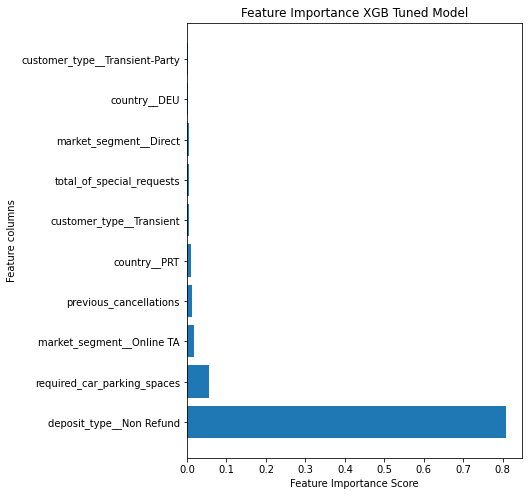

In [278]:
plt.figure(figsize=(6,8))
plt.title('Feature Importance XGB Tuned Model')
plt.ylabel('Feature columns')
plt.xlabel('Feature Importance Score')
plt.barh(df_feat['index'],df_feat['feature importance'])
plt.savefig('Feature Importance.png')
plt.show()

# Classification Report Model

In [223]:
cfr={
    'RF_Base' : [RF_acc_base_train,RF_acc_base_ts,RF_f1_base_train,RF_f1_base_ts,RF_prec_base_train,RF_prec_base_ts,RF_rec_base_train,RF_rec_base_ts],
    
    'XGB_base':[XGB_acc_base_train,XGB_acc_base_ts,XGB_f1_base_train,XGB_f1_base_ts,XGB_prec_base_train,XGB_prec_base_ts,XGB_rec_base_train,XGB_rec_base_ts],
    
    'DT_Base' : [DT_acc_base_train,DT_acc_base_ts,DT_f1_base_train,DT_f1_base_ts,DT_prec_base_train,DT_prec_base_ts,DT_rec_base_train,DT_rec_base_ts],
    
    'RF_Poly' : [RF_acc_pol_train,RF_acc_pol_ts,RF_f1_pol_train,RF_f1_pol_ts,RF_prec_pol_train,RF_prec_pol_ts,RF_rec_pol_train,RF_rec_pol_ts],
    
    'XGB_Poly':[XGB_acc_pol_train,XGB_acc_pol_ts,XGB_f1_pol_train,XGB_f1_pol_ts,XGB_prec_pol_train,XGB_prec_pol_ts,XGB_rec_pol_train,XGB_rec_pol_ts],
    
    'DT_Poly' : [DT_acc_pol_train,DT_acc_pol_ts,DT_f1_pol_train,DT_f1_pol_ts,DT_prec_pol_train,DT_prec_pol_ts,DT_rec_pol_train,DT_rec_pol_ts],
    
     'RF_Tuned' : [RF_acc_tun_train,RF_acc_tun_ts,RF_f1_tun_train,RF_f1_tun_ts,RF_prec_tun_train,RF_prec_tun_ts,RF_rec_tun_train,RF_rec_tun_ts],
   
    'XGB_Tuned':[XGB_acc_tun_train,XGB_acc_tun_ts,XGB_f1_tun_train,XGB_f1_tun_ts,XGB_prec_tun_train,XGB_prec_tun_ts,XGB_rec_tun_train,XGB_rec_tun_ts],
  
     'DT_Tuned' : [DT_acc_tun_train,DT_acc_tun_ts,DT_f1_tun_train,DT_f1_tun_ts,DT_prec_tun_train,DT_prec_tun_ts,DT_rec_tun_train,DT_rec_tun_ts],
   
}
df_cr=pd.DataFrame(cfr, index=['Accuracy Train','Accuracy Test','F1 Train','F1 Test','Precision Train','Precision Test','Recall Train','Recall Test'])
df_cr.T.round(3)

,Accuracy Train,Accuracy Test,F1 Train,F1 Test,Precision Train,Precision Test,Recall Train,Recall Test
RF_Base,0.996,0.896,0.995,0.856,0.997,0.896,0.993,0.819
XGB_base,0.898,0.882,0.861,0.838,0.879,0.864,0.843,0.813
DT_Base,0.996,0.861,0.995,0.814,0.998,0.814,0.992,0.814
RF_Poly,0.996,0.879,0.995,0.828,0.997,0.889,0.992,0.774
XGB_Poly,0.901,0.882,0.865,0.838,0.887,0.868,0.844,0.810
DT_Poly,0.996,0.858,0.995,0.810,0.998,0.811,0.992,0.809
RF_Tuned,0.942,0.889,0.921,0.844,0.946,0.897,0.896,0.797
XGB_Tuned,0.973,0.896,0.964,0.859,0.969,0.880,0.959,0.839
DT_Tuned,0.901,0.868,0.868,0.823,0.866,0.826,0.870,0.819


In [268]:
acc_score={
    'RF_Base' : [RF_acc_base_ts],    
    'XGB_base':[XGB_acc_base_ts],
    'DT_Base' : [DT_acc_base_ts],
    'RF_Poly' : [RF_acc_pol_ts],
    'XGB_Poly':[XGB_acc_pol_ts],
    'DT_Poly' : [DT_acc_pol_ts],
     'RF_Tuned' : [RF_acc_tun_ts],
    'XGB_Tuned':[XGB_acc_tun_ts],
     'DT_Tuned' : [DT_acc_tun_ts],
}


df_score=pd.DataFrame(index=acc_score.keys(), data=acc_score.values(),columns=['Accuracy Test']).reset_index()
df_score

,index,Accuracy Test
0,RF_Base,0.896402
1,XGB_base,0.882010
2,DT_Base,0.860634
3,RF_Poly,0.879029
4,XGB_Poly,0.882478
5,DT_Poly,0.857654
6,RF_Tuned,0.889461
7,XGB_Tuned,0.896487
8,DT_Tuned,0.867532


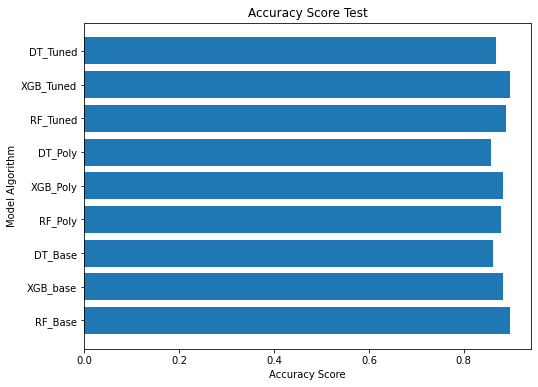

In [276]:
plt.figure(figsize=(8,6))
plt.title('Accuracy Score Test')
plt.ylabel('Model Algorithm')
plt.xlabel('Accuracy Score')
plt.barh(df_score['index'],df_score['Accuracy Test'])
plt.savefig("Accuracy Score.png")
plt.show()

## Rekomendasi Model 

##### Berdasarkan nilai accuracy tertinggi maka dipilihi model XGB_tuned sebagai model yang kami rekomendasikan.

# Export Model

In [224]:
joblib.dump(XGB_Tuned, 'Booking_hotel_classification')

['Booking_hotel_classification']

In [225]:
model_booking=joblib.load('Booking_hotel_classification')